In [1]:
# paper revision use
# examine the monthly mean spatial distribution of mean omf w/ and w/o bias correction for each channel
# initial built: 2025/09/02
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
print(cartopy.__version__)

0.24.1


In [16]:
avg_period = '2022061500_2022081000'
expids     = ['full_CTRL','full_CTRL_noinf']

instr      = 'atms'
channel    = '1'
meshsize   = '5.0'

expshort = {'full_CTRL': 'CTRL', 
            'full_CTRL_noinf': 'NOINF'}

In [17]:
data={};
pltvar=['omf','omfnbc'] # omf (with BC) or omfnbc (without BC)

savefig_dir = f'/gpfs/f6/bil-coastal-gfdl/scratch/Chih-Chi.Hu/python_codes/figures/rad_meshplot/{instr}/ch{channel}/'

for exp in expids:
    data[exp]={};
    path_dir   = f'/gpfs/f6/bil-coastal-gfdl/scratch/Chih-Chi.Hu/gsidiag/ush/radstats/data/meshmean/{exp}/{avg_period}/mesh{meshsize}/'
    for varbc in pltvar:
        fn = path_dir + f'meshmean_ges_{varbc}_{instr}_{channel}_{exp}.npz'
        data[exp][varbc] = np.load(fn)

In [18]:
# setup the grid
dx = float(meshsize)
lon = np.arange(0.0+dx*0.5, 360.0+dx*0.5, dx)
lat = np.arange(-90.0+dx*0.5, 90.0+dx*0.5, dx)
lons, lats = np.meshgrid(lon,lat)

In [19]:
# colorscale parameters:
savefig = True

if instr == 'atms':
    if channel in ('16'):
        min_data = 500; val_max  = 4.0;  diff_max = 1.0;    rms_max  = 9;    rmsdiff_max = 0.7
    elif channel in ('17'):
        min_data = 500; val_max  = 5.0;  diff_max = 0.7;    rms_max  = 13;   rmsdiff_max = 0.5
    elif channel in ('18'):
        min_data = 500; val_max  = 4.0;  diff_max = 0.30;   rms_max  = 11;   rmsdiff_max = 0.20
    elif channel in ('19'):
        min_data = 500; val_max  = 3.5;  diff_max = 0.30;   rms_max  = 8.5;  rmsdiff_max = 0.20
    elif channel in ('20'):
        min_data = 500; val_max  = 2.5;  diff_max = 0.25;   rms_max  = 6.5;  rmsdiff_max = 0.20
    elif channel in ('21'):
        min_data = 500; val_max  = 1.5;  diff_max = 0.25;   rms_max  = 4.5;  rmsdiff_max = 0.25
    elif channel in ('22'):
        min_data = 500; val_max  = 1.5;  diff_max = 0.30;   rms_max  = 4.0;  rmsdiff_max = 0.30     
        
        
elif instr == 'amsua':
    if channel in ('1'):
        min_data = 500; val_max  = 3.5;  diff_max = 1.2;   rms_max  = 7;   rmsdiff_max = 0.7
    elif channel in ('2'):
        min_data = 500; val_max  = 5;    diff_max = 1.6;   rms_max  = 12;  rmsdiff_max = 1.2
    elif channel in ('3'):
        min_data = 500; val_max  = 3;    diff_max = 1.0;   rms_max  = 6.0;  rmsdiff_max = 0.6
    elif channel in ('4'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.5;  diff_max = 0.12;  rms_max  = 1.0;  rmsdiff_max = 0.08
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1;  diff_max = 0.12;  rms_max  = 1.4;  rmsdiff_max = 0.08 
    elif channel in ('5'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.2;  diff_max = 0.04;  rms_max  = 0.6;  rmsdiff_max = 0.035
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1;  diff_max = 0.04;  rms_max  = 1.0;  rmsdiff_max = 0.035
            
    elif channel in ('6'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.15; diff_max = 0.035; rms_max  = 0.25; rmsdiff_max = 0.015 
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.60; diff_max = 0.035; rms_max  = 1.60; rmsdiff_max = 0.03 

    elif channel in ('7'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.15; diff_max = 0.020; rms_max  = 0.30; rmsdiff_max = 0.007
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.50; diff_max = 0.020; rms_max  = 1.60; rmsdiff_max = 0.015  

    elif channel in ('8'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.15; diff_max = 0.015; rms_max  = 0.25; rmsdiff_max = 0.007
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.10; diff_max = 0.015; rms_max  = 1.00; rmsdiff_max = 0.010

    elif channel in ('9'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.18; diff_max = 0.025; rms_max  = 0.25; rmsdiff_max = 0.015
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.10; diff_max = 0.025; rms_max  = 1.25; rmsdiff_max = 0.025

    elif channel in ('10'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.20; diff_max = 0.025; rms_max  = 0.30; rmsdiff_max = 0.010
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.20; diff_max = 0.025; rms_max  = 1.40; rmsdiff_max = 0.015
                
    elif channel in ('11'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.35; diff_max = 0.020; rms_max  = 0.50; rmsdiff_max = 0.012
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.25; diff_max = 0.020; rms_max  = 1.25; rmsdiff_max = 0.012

    elif channel in ('12'):
        if varbc == 'omf':
            min_data = 500; val_max  = 0.70; diff_max = 0.025; rms_max  = 0.85; rmsdiff_max = 0.018
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 1.40; diff_max = 0.025; rms_max  = 1.60; rmsdiff_max = 0.018

    elif channel in ('13'):
        if varbc == 'omf':
            min_data = 500; val_max  = 1.20; diff_max = 0.030; rms_max  = 1.60; rmsdiff_max = 0.025
        elif varbc == 'omfnbc':
            min_data = 500; val_max  = 2.50; diff_max = 0.030; rms_max  = 3.00; rmsdiff_max = 0.025

    elif channel in ('15'):
        min_data = 500; val_max  = 4.50; diff_max = 1.200; rms_max  = 9.00; rmsdiff_max = 0.8

In [20]:
# mask out pixels with few data points:
mask={};
for exp in expids:
    mask[exp]={};
    for varbc in pltvar:
        mask[exp][varbc] = data[exp][varbc]['ctmesh'] > min_data

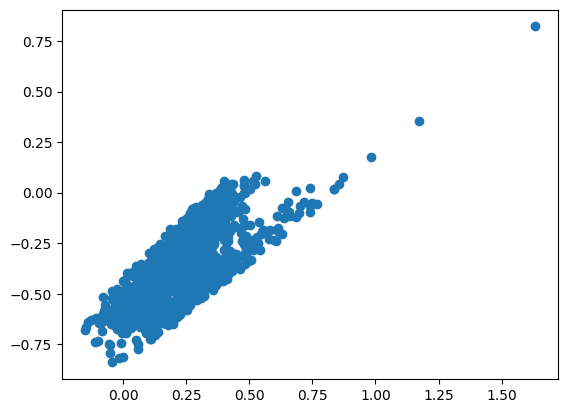

In [23]:
pltvar1 = data['full_CTRL']['omf']['omfmesh'] - data['full_CTRL_noinf']['omf']['omfmesh']
pltvar1[~mask['full_CTRL']['omf']] = np.nan

pltvar2 = data['full_CTRL']['omfnbc']['omfmesh'] - data['full_CTRL_noinf']['omfnbc']['omfmesh'] 
pltvar2[~mask['full_CTRL']['omfnbc']] = np.nan

plt.scatter(pltvar1, pltvar2)